# **Solución del Parcial 2**

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Integrantes:**

1. Dilan Correa / dilancorrea@javerianacali.edu.co
.
.
.
2. Juan Jose Marín / juanjo145@javerianacali.edu.co
.
.
.
3. Guido Salazar / guidosalazar@javerianacali.edu.co

**Fecha máxima:** 07/04/2024


# **Data set**

El conjunto de datos MNIST es uno de los conjuntos de datos más conocidos y utilizados en el campo del aprendizaje automático y la visión por computadora. MNIST (Modified National Institute of Standards and Technology database) es una base de datos de imágenes de dígitos escritos a mano, recopilada a partir de dígitos escritos por empleados y estudiantes del Instituto Nacional de Estándares y Tecnología (NIST) de los Estados Unidos. Fue modificado y ampliamente utilizado como un estándar de referencia en la comunidad de aprendizaje automático.

Esta conta de 60000 imagenes etiquetadas de digitos escritos a mano, del 0 a 9.

Cada imagen en el conjunto de datos MNIST es una imagen en escala de grises de 28x28 píxeles, lo que significa que cada imagen tiene una resolución total de 784 píxeles (28x28). Cada píxel tiene un valor que representa la intensidad de la escala de grises codificada a 8 bits, donde 0 significa blanco y 255 significa negro.



Para no trabajar directamente con imagenes, se creo una base de datos con 16 caracteristicas extraidas de la siguiente manera:

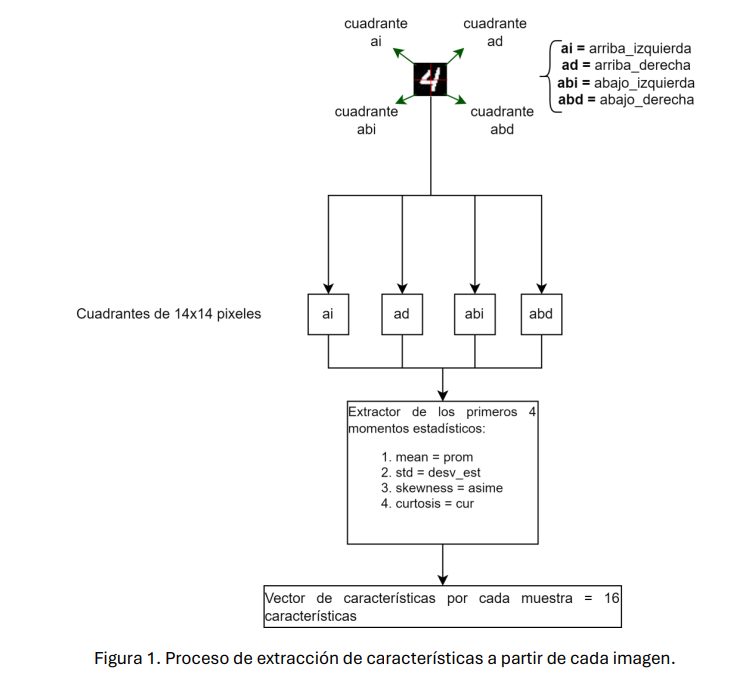

Para efectos de este parcial, se van a realizar unos modelos de clasificación unicamente para los numeros 3 y 1.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_mnist_parcial2.csv to data_mnist_parcial2 (1).csv


# EDA

## Pre Eda

In [ ]:
import pandas as pd

images_db = pd.read_csv("data_mnist_parcial2.csv")

images_db

Clase  Muestra    prom_ai  desv_est_ai     cur_ai  asime_ai    prom_ad  \
0        0.0      1.0  26.423469    70.324244   5.018320  2.583517  56.290816   
1        0.0      2.0  27.632653    72.884643   4.419385  2.473292  67.295918   
2        0.0      3.0  22.806122    69.034694   6.310091  2.846648  62.602041   
3        0.0      4.0  24.000000    68.428422   5.939083  2.748865  67.795918   
4        0.0      5.0  43.204082    89.498485   1.142878  1.727267  72.229592   
...      ...      ...        ...          ...        ...       ...        ...   
59995    9.0   5945.0  17.362245    57.914226  10.423489  3.451194  26.224490   
59996    9.0   5946.0  19.607143    58.643629   8.304009  3.101074  29.045918   
59997    9.0   5947.0  22.321429    64.271854   6.369751  2.805948  34.729592   
59998    9.0   5948.0  20.836735    62.455730   7.484121  2.988922  36.071429   
59999    9.0   5949.0  16.602041    53.095071  10.664070  3.411037  32.806122   

       desv_est_ad    cur_ad  asime_ad   prom_abi  desv_est_abi    cur_abi  \
0        96.709285 -0.102610  1.309208  46.913265     89.507368   0.796805   
1       101.806660 -0.672737  1.070041  53.204082     95.757395   0.079337   
2       101.432117 -0.441062  1.170898  58.270408     99.584204  -0.249182   
3       104.234621 -0.795024  1.032121  61.362245    100.876498  -0.472879   
4       107.083523 -0.942011  0.956966  65.346939    103.142818  -0.648156   
...            ...       ...       ...        ...           ...        ...   
59995    64.072031  4.481945  2.413692  16.974490     56.052220  10.467288   
59996    71.249582  3.954564  2.346364  26.204082     69.640031   5.065538   
59997    78.170101  2.669469  2.076801  26.612245     69.321218   4.442665   
59998    78.108866  2.438067  2.012816  21.826531     59.210887   6.543794   
59999    73.896323  2.955224  2.124952  20.688776     61.007695   7.116522   

       asime_abi   prom_abd  desv_est_abd    cur_abd  asime_abd  
0       1.599174  29.020408     72.255567   3.711094   2.305086  
1       1.386028  32.647959     76.422854   2.972746   2.168015  
2       1.261563  42.581633     87.862302   1.285578   1.753728  
3       1.172445  36.974490     81.477769   2.311907   2.006470  
4       1.092750  51.581633     93.477480   0.344114   1.450771  
...          ...        ...           ...        ...        ...  
59995   3.416844  11.964286     46.062555  17.052985   4.254190  
59996   2.579932  24.290816     65.426171   5.831213   2.682159  
59997   2.467656  22.653061     65.140288   6.524331   2.848052  
59998   2.787147  15.107143     52.176054  12.165324   3.629309  
59999   2.922910  12.331633     46.623954  14.885838   4.002001  

[60000 rows x 18 columns]

In [ ]:
images_db.shape

(60000, 18)

La base de datos cuenta con 60000 registros que se componen de 18 columnas. 16 son las caracteristicas mencionadas en la parte superior y de las otras dos, la columna de la clase hace referencia al numero que pertenece a cada registro. Por ultimo la caracteristica muestra, que al no ser una caracterisitca relevante, entonces se decidio eliminarla.

In [ ]:
images_db["Clase"].value_counts().to_frame()

count
Clase       
1.0     6742
7.0     6265
3.0     6131
2.0     5958
9.0     5949
0.0     5923
6.0     5918
8.0     5851
4.0     5842
5.0     5421

Como solo vamos a clasificar con respecto a las Clases 3 y 1 se filtra la base de datos original a una nueva solo con los registros que pertenezcan a dicha clase.

In [ ]:
images_db.drop(columns=["Muestra"], inplace=True)
images_db_fil = images_db.loc[(images_db["Clase"] == 1) | (images_db["Clase"] == 3)]
images_db_fil

Clase    prom_ai  desv_est_ai      cur_ai   asime_ai    prom_ad  \
5923     1.0   0.693878     7.741234  160.175504  12.462006  37.994898   
5924     1.0  19.678571    63.799780    8.022241   3.115969  22.403061   
5925     1.0  10.454082    46.724256   20.448936   4.677441  14.897959   
5926     1.0  15.816327    57.750050   11.648669   3.650877  10.872449   
5927     1.0   0.760204    10.615672  191.005128  13.892629  38.545918   
...      ...        ...          ...         ...        ...        ...   
24749    3.0  13.198980    49.560375   14.760438   3.944436  45.377551   
24750    3.0   8.484694    40.029514   25.811229   5.124344  50.275510   
24751    3.0  24.591837    68.296896    5.832391   2.717253  58.107143   
24752    3.0   4.377551    29.514789   54.612864   7.341165  56.178571   
24753    3.0  13.857143    52.432853   14.113750   3.914020  55.576531   

       desv_est_ad     cur_ad  asime_ad   prom_abi  desv_est_abi    cur_abi  \
5923     83.148104   2.053890  1.950092  41.831633     88.081057   1.324969   
5924     66.117905   7.111410  2.938332   6.489796     37.990263  34.757503   
5925     54.481412  12.677032  3.739268   3.219388     21.096905  50.703942   
5926     44.902832  19.876808  4.493767  13.214286     52.246521  15.388261   
5927     84.070445   1.873110  1.909574  37.448980     82.300299   2.155600   
...            ...        ...       ...        ...           ...        ...   
24749    86.175902   0.942990  1.622873  33.290816     74.819389   2.839154   
24750    90.132700   0.531403  1.500691  33.357143     75.757568   2.917950   
24751    97.675659  -0.200094  1.265581  46.122449     88.666512   1.118352   
24752    93.820626  -0.034801  1.303456  46.107143     89.433613   0.820951   
24753    96.637547   0.000002  1.344643  38.744898     81.735675   1.646539   

       asime_abi   prom_abd  desv_est_abd    cur_abd  asime_abd  
5923    1.781017   6.903061     37.456039  31.338809   5.673224  
5924    5.974527  41.459184     88.887302   1.460323   1.820570  
5925    7.030074  26.908163     71.977900   4.501088   2.492908  
5926    4.116300  19.392857     61.608323   8.740995   3.189462  
5927    1.971764   7.821429     40.720974  28.233113   5.410607  
...          ...        ...           ...        ...        ...  
24749   2.100610  28.923469     71.182213   3.730026   2.314590  
24750   2.125821  21.489796     62.023982   6.806094   2.871690  
24751   1.693033  34.107143     77.291086   2.959163   2.139451  
24752   1.611087  23.811224     63.387455   6.176455   2.736614  
24753   1.827619  31.030612     74.427880   3.065271   2.180274  

[12873 rows x 17 columns]

## Eda Sobre la base de datos filtada

### Información de la BD

In [ ]:
print(images_db_fil.shape)
images_db_fil["Clase"].value_counts().to_frame()

(12873, 17)


count
Clase       
1.0     6742
3.0     6131

La base de datos nueva cuenta con 12873 registros y las 17 caracteristicas previamente descritas. Donde para la clase 1 son 6742 muestras
y para la clase 3 6131.

In [ ]:
images_db_fil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12873 entries, 5923 to 24753
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Clase         12873 non-null  float64
 1   prom_ai       12873 non-null  float64
 2   desv_est_ai   12873 non-null  float64
 3   cur_ai        12526 non-null  float64
 4   asime_ai      12526 non-null  float64
 5   prom_ad       12873 non-null  float64
 6   desv_est_ad   12873 non-null  float64
 7   cur_ad        12872 non-null  float64
 8   asime_ad      12872 non-null  float64
 9   prom_abi      12873 non-null  float64
 10  desv_est_abi  12873 non-null  float64
 11  cur_abi       12841 non-null  float64
 12  asime_abi     12841 non-null  float64
 13  prom_abd      12873 non-null  float64
 14  desv_est_abd  12873 non-null  float64
 15  cur_abd       12873 non-null  float64
 16  asime_abd     12873 non-null  float64
dtypes: float64(17)
memory usage: 1.8 MB


En la base de datos se puede pareciar que no hay nulos. No obstante, hay que comprar que no hayan datos en NaN.

In [ ]:
images_db_fil.describe()

Clase       prom_ai   desv_est_ai        cur_ai      asime_ai  \
count  12873.000000  12873.000000  12873.000000  12526.000000  12526.000000   
mean       1.952536     17.034929     47.704724     44.297293      5.413603   
std        0.998912     15.314844     28.762661     60.499603      3.914823   
min        1.000000      0.000000      0.000000     -1.671437      0.573204   
25%        1.000000      2.525510     19.859436      4.418177      2.458938   
50%        1.000000     14.551020     52.941453     12.061845      3.653935   
75%        3.000000     27.362245     71.504238     63.602017      7.898313   
max        3.000000     92.372449    122.565514    191.005128     13.892629   

            prom_ad   desv_est_ad        cur_ad      asime_ad      prom_abi  \
count  12873.000000  12873.000000  12872.000000  12872.000000  12873.000000   
mean      35.867612     79.023302      4.270426      2.241896     27.992984   
std       14.380776     15.345281      8.144522      0.948715     14.069341   
min        0.000000      0.000000     -1.791937      0.356441      0.000000   
25%       25.739796     70.007011      0.993171      1.672581     17.938776   
50%       34.443878     80.094038      2.630780      2.091198     27.602041   
75%       44.673469     89.719042      5.075946      2.591818     37.352041   
max      103.433673    118.591697    191.005128     13.892629     90.693878   

       desv_est_abi       cur_abi     asime_abi      prom_abd  desv_est_abd  \
count  12873.000000  12841.000000  12841.000000  12873.000000  12873.000000   
mean      68.592123      9.303026      2.881055     28.457868     68.332734   
std       19.956054     17.370032      1.546245     17.061485     21.485115   
min        0.000000     -1.556814      0.587533      0.336735      4.702244   
25%       58.368589      2.099368      1.960803     13.015306     51.057697   
50%       72.088333      4.437375      2.465769     28.178571     72.785720   
75%       82.721444      9.285839      3.266265     40.035714     84.623063   
max      115.264957    191.005128     13.892629    107.984694    125.997630   

            cur_abd     asime_abd  
count  12873.000000  12873.000000  
mean      11.825704      3.115070  
std       18.562058      1.847072  
min       -1.904041      0.309773  
25%        1.658821      1.844682  
50%        4.238569      2.429811  
75%       14.853489      4.014252  
max      191.005128     13.892629

En la base de datos podemos apreciar como se encuentran datos con 0. Al ser estos valores estadisticos descritos previamente tiene sentido que las variables puedan tomar el valor de 0.

### Limpieza de la BD

In [ ]:
images_db_fil=images_db_fil.drop_duplicates()

print(images_db_fil.shape)
#(12873, 17) Resultado previo

(12873, 17)


Se puede apreciar que como no se eliminaron registros entonces no habian duplicados dentro de la BD.

In [ ]:
images_db_fil.isnull().sum()

Clase             0
prom_ai           0
desv_est_ai       0
cur_ai          347
asime_ai        347
prom_ad           0
desv_est_ad       0
cur_ad            1
asime_ad          1
prom_abi          0
desv_est_abi      0
cur_abi          32
asime_abi        32
prom_abd          0
desv_est_abd      0
cur_abd           0
asime_abd         0
dtype: int64

Se puede pareciar que hay datos que estan en nulos dentro de la base de datos. Por lo que al ser valores numericos y sobre todo estadisticos, se decidio usar la media para reemplazar los nulos.

In [ ]:
images_db_fil = images_db_fil.fillna(images_db_fil.median())

In [ ]:
images_db_fil.isnull().sum()

Clase           0
prom_ai         0
desv_est_ai     0
cur_ai          0
asime_ai        0
prom_ad         0
desv_est_ad     0
cur_ad          0
asime_ad        0
prom_abi        0
desv_est_abi    0
cur_abi         0
asime_abi       0
prom_abd        0
desv_est_abd    0
cur_abd         0
asime_abd       0
dtype: int64

Limpiamos los valores nulos de acuerdo a la mediana de su respectiva característica.

In [ ]:
images_db_fil.isna().any().any()

False

### Histogramas de la BD

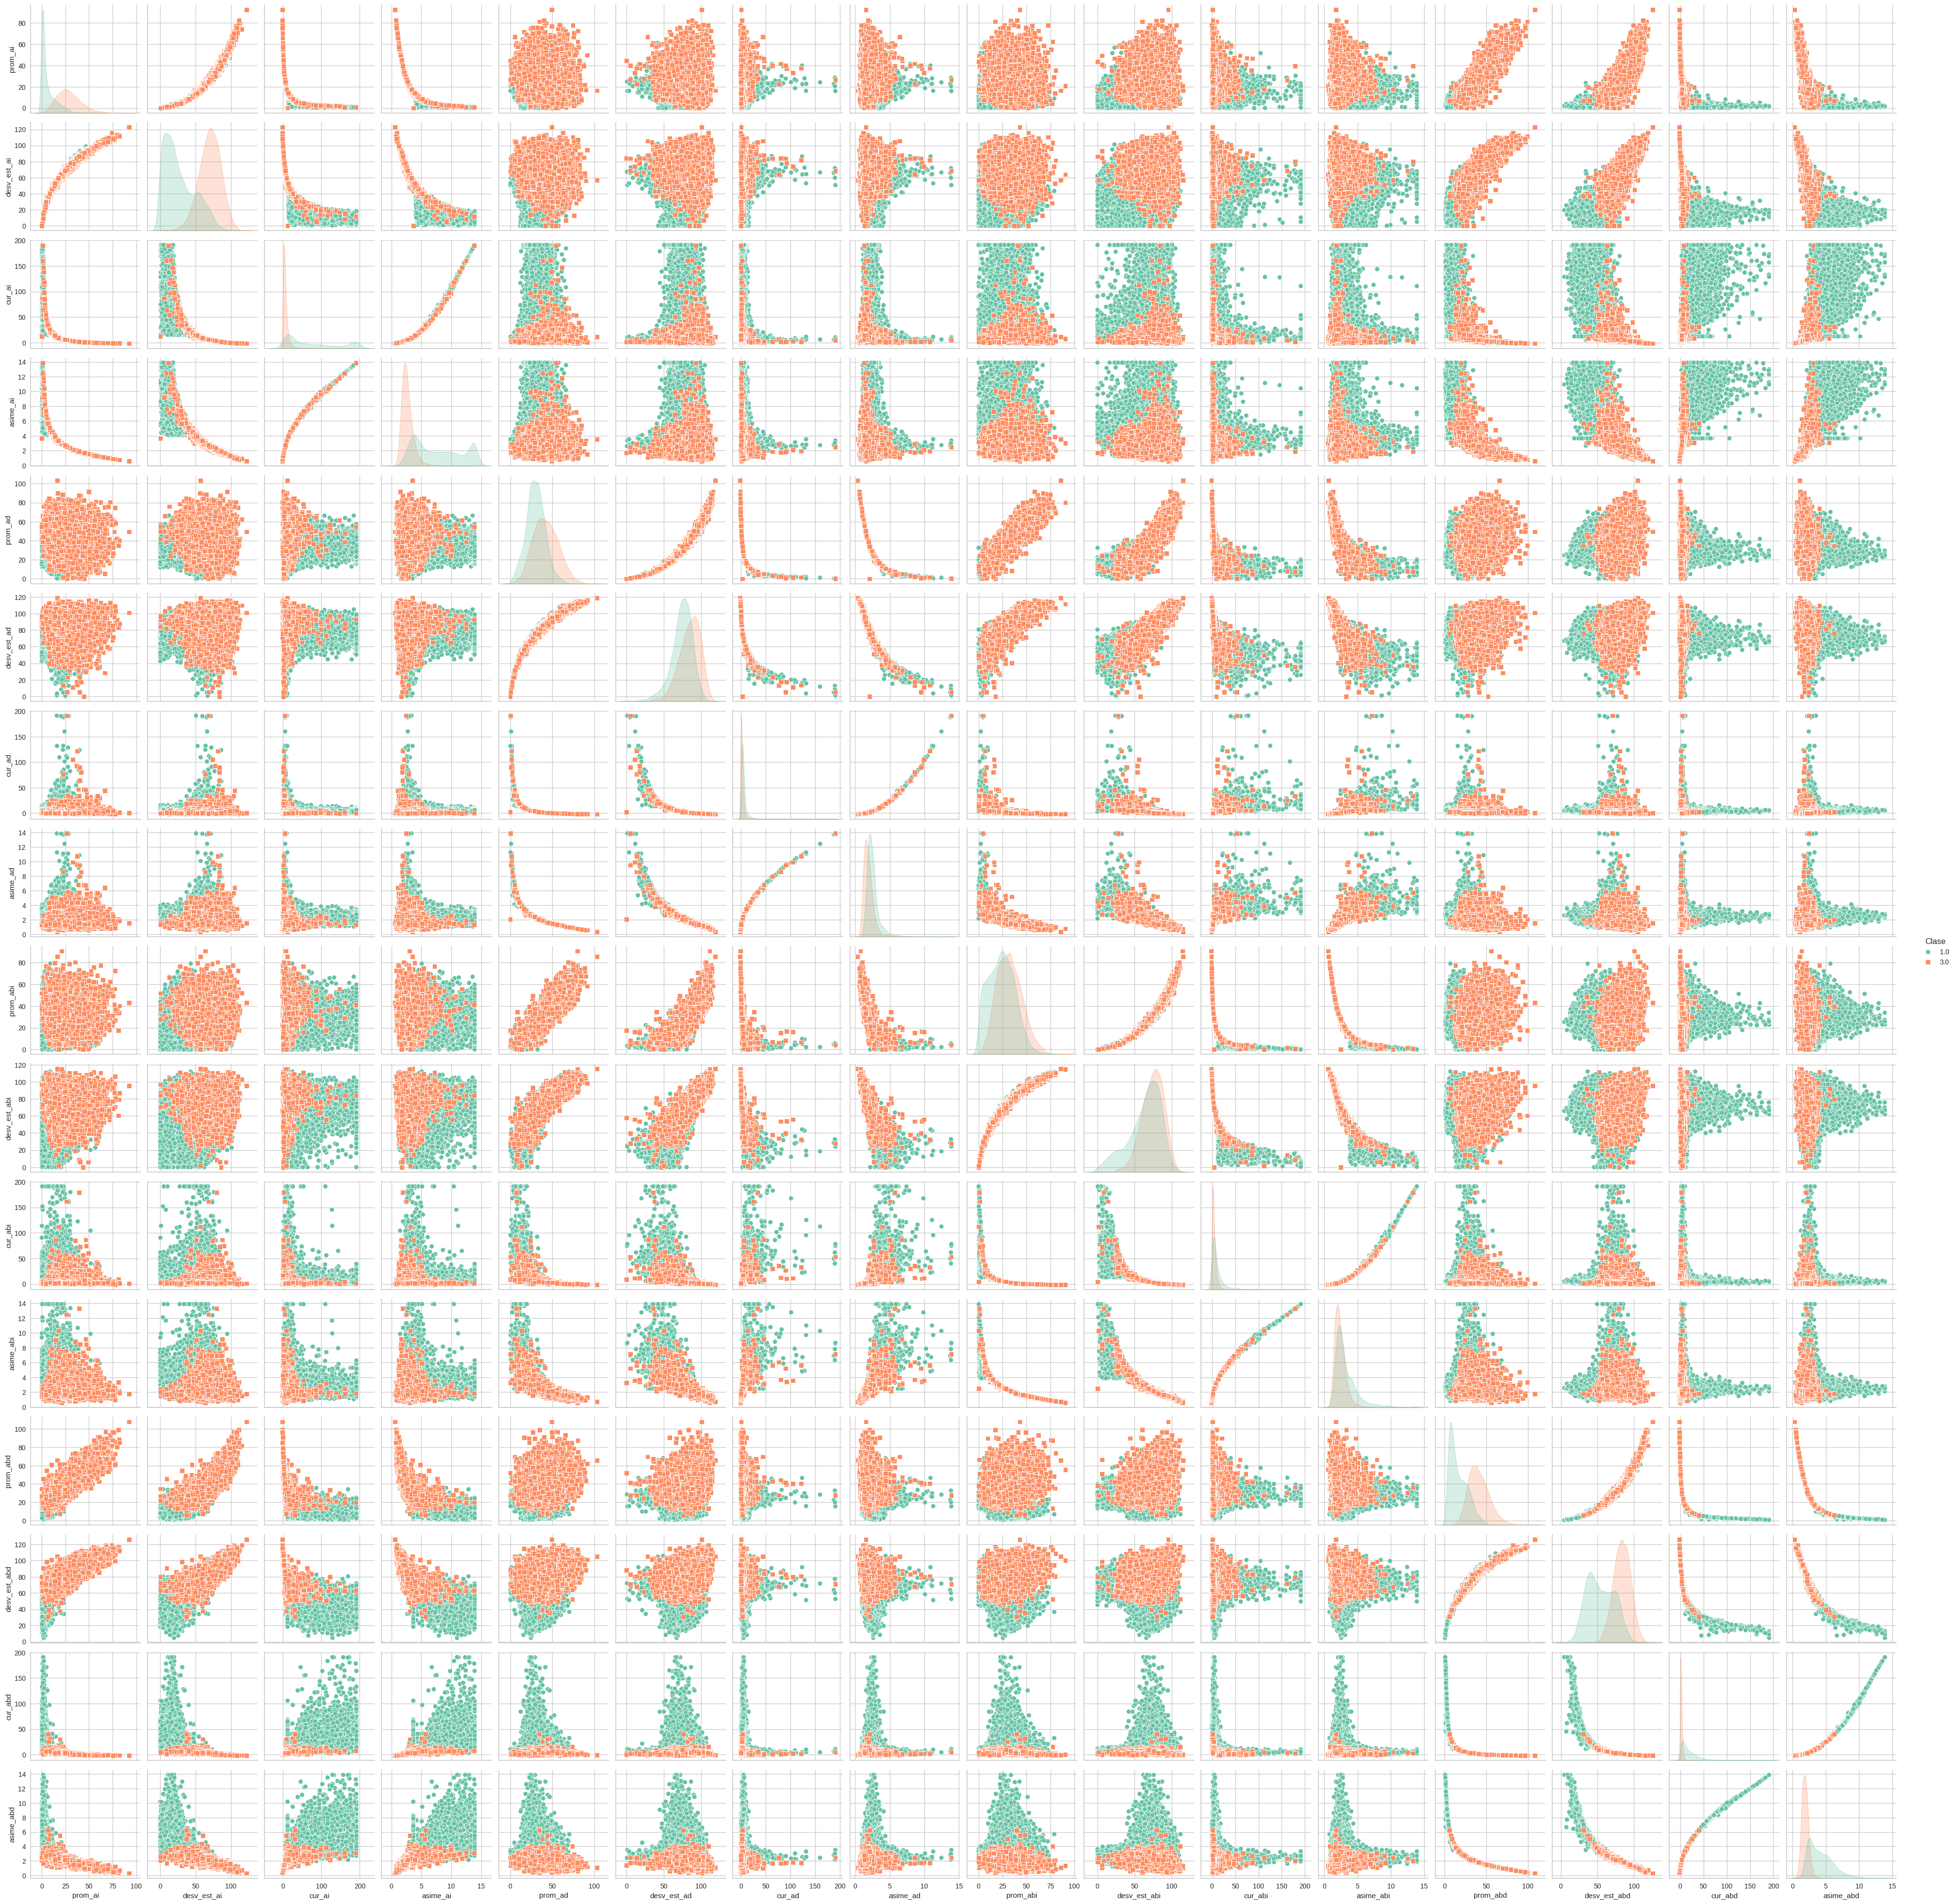

In [ ]:
import seaborn as sns

sns.pairplot(images_db_fil, hue="Clase", markers=["o", "s"], palette="Set2")

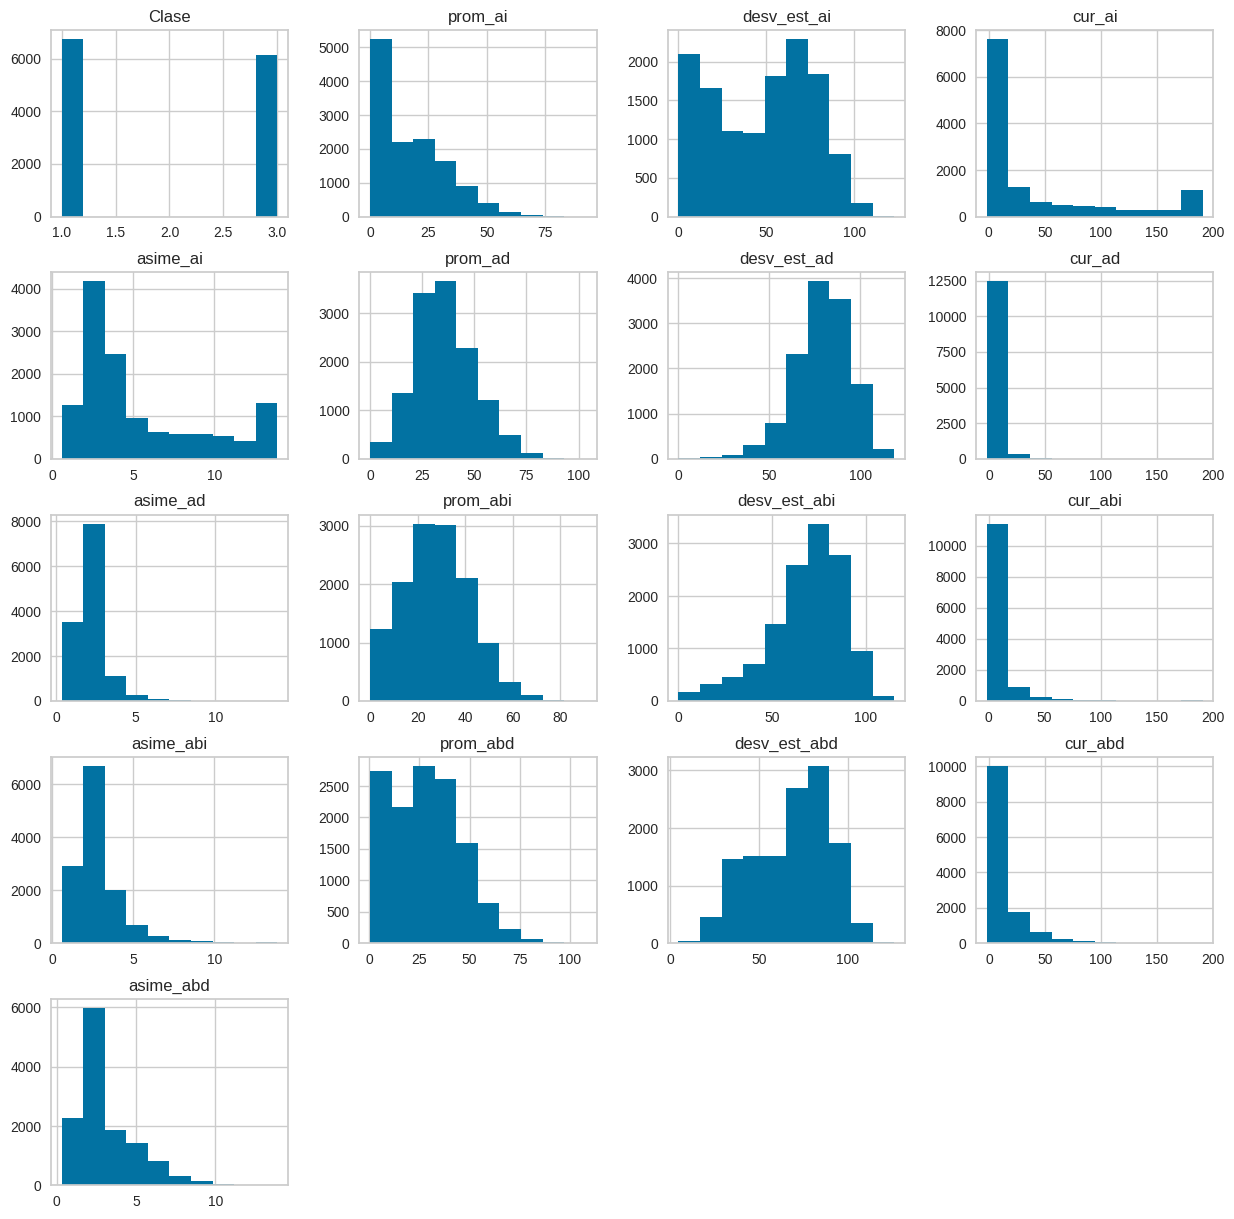

In [ ]:
import matplotlib.pyplot as plt

images_db_fil.hist(figsize = (15,15),bins=10)
plt.show()

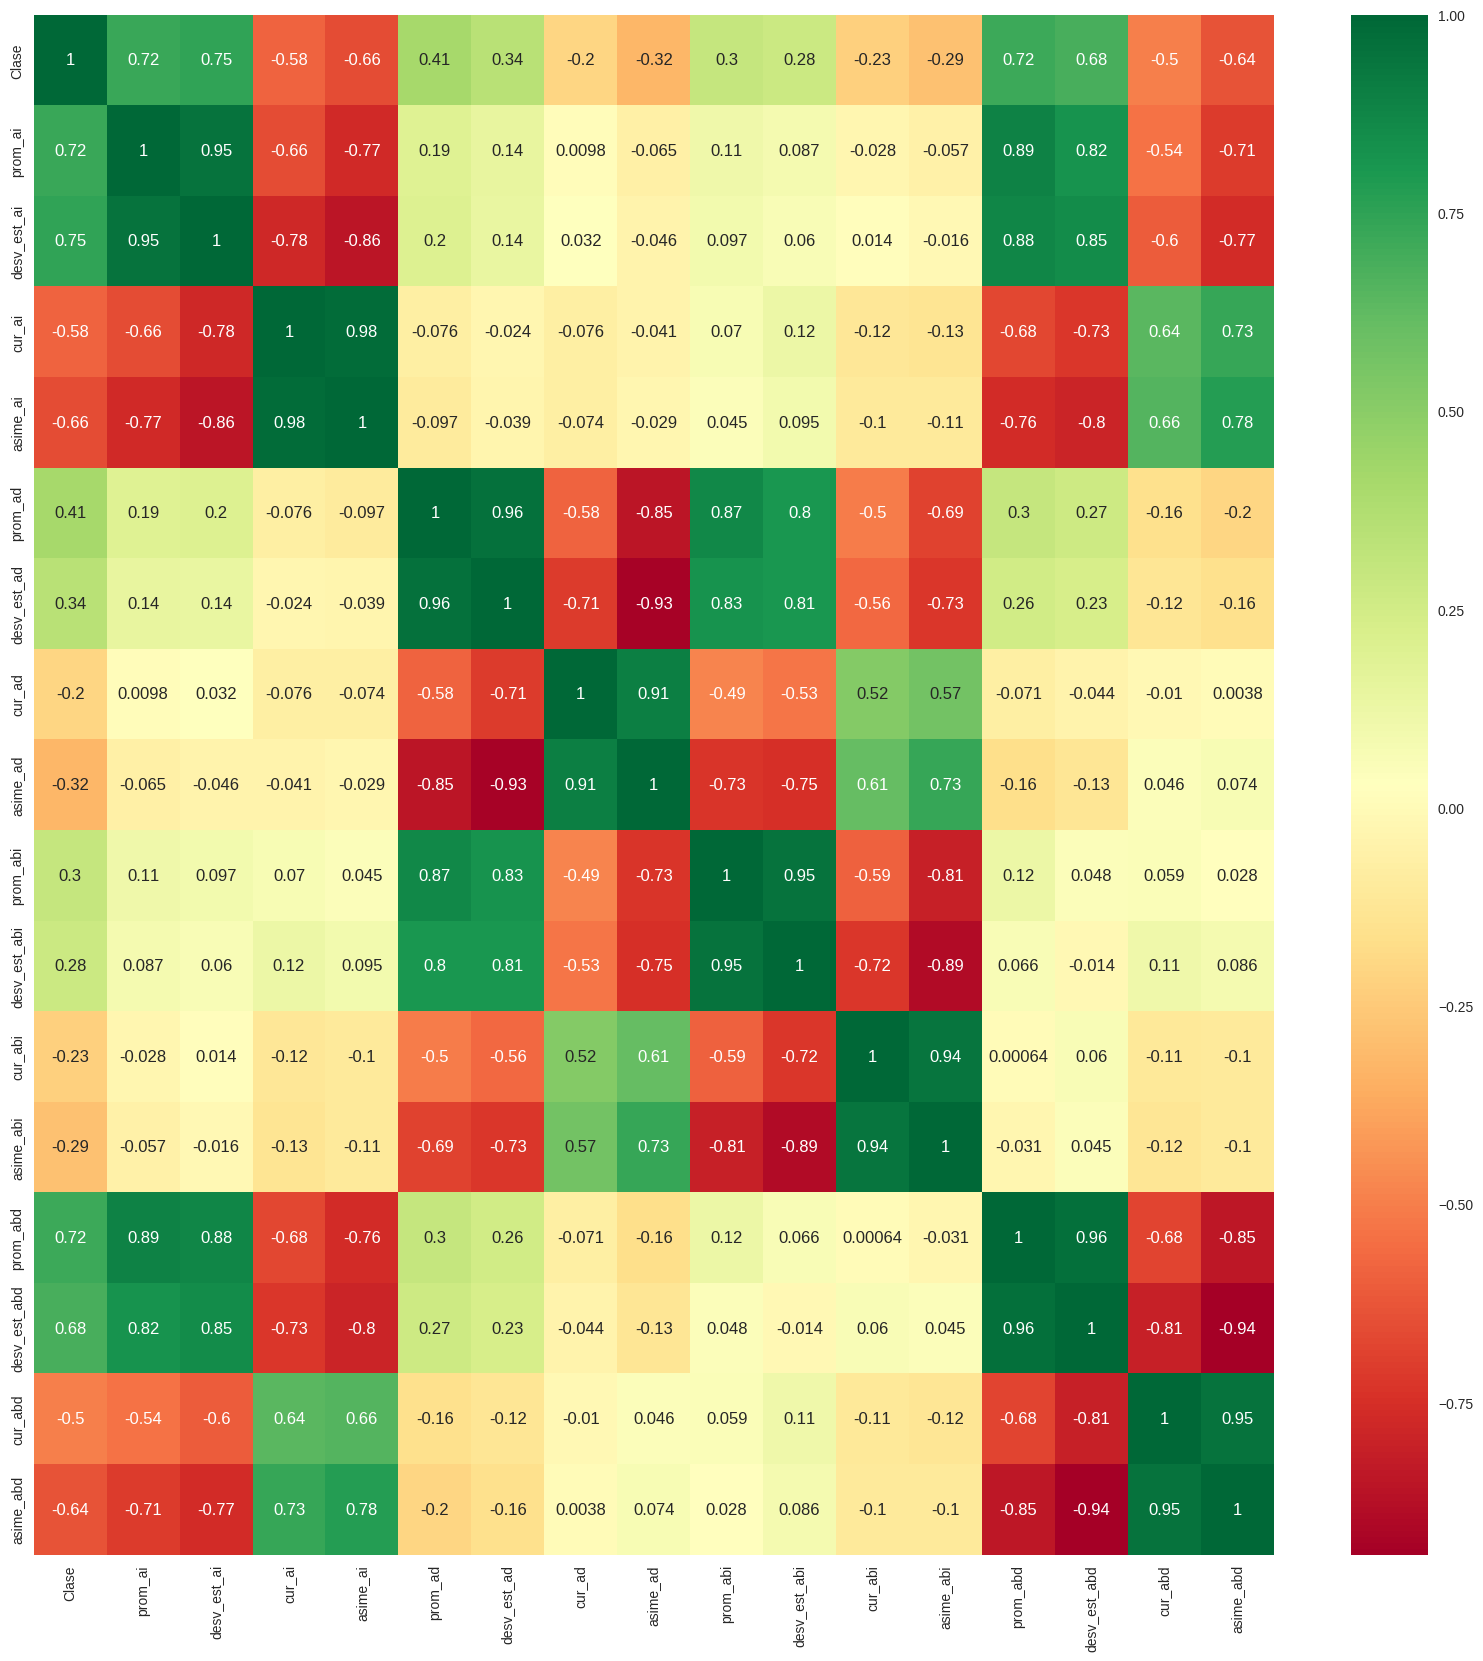

In [ ]:
import seaborn as sns

cormat = images_db_fil.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(images_db_fil[top_corr_features].corr(),annot=True,cmap="RdYlGn")

A ojo viendo los diagramas de correlación se pueden ver que hay 8 caracteristicas que tienen una correlación $c_{i, clase} = |c_{i, clase}|$ por encima o igual a 0.5 mas aun 6 de estas tienen una correlación e valor absoluto por encima del 0.6. Estas 8 caracteristicas son

desv_est_ai 0.75 \\
prom_ai 0.72 \\
prom_abd 0.72 \\
desv_esta_abd 0.68 \\
cur_abd -0.50 \\
cur_ai -0,58 \\
asime_abd -0.64 \\
asime_ai -0.66 \\


# FEATURE SELECTION

##Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [ ]:
# Divide el conjunto de datos en características (X) y la variable objetivo (y)
X = images_db_fil.drop(columns=['Clase'])
y = images_db_fil['Clase']

         Feature  Mutual_Info_Score
0        prom_ai           0.383997
3       asime_ai           0.373521
2         cur_ai           0.367641
15     asime_abd           0.366958
1    desv_est_ai           0.362542
14       cur_abd           0.358817
12      prom_abd           0.356352
13  desv_est_abd           0.307822
7       asime_ad           0.101754
4        prom_ad           0.098820
6         cur_ad           0.093992
5    desv_est_ad           0.073434
11     asime_abi           0.061440
10       cur_abi           0.053254
8       prom_abi           0.052265
9   desv_est_abi           0.044714


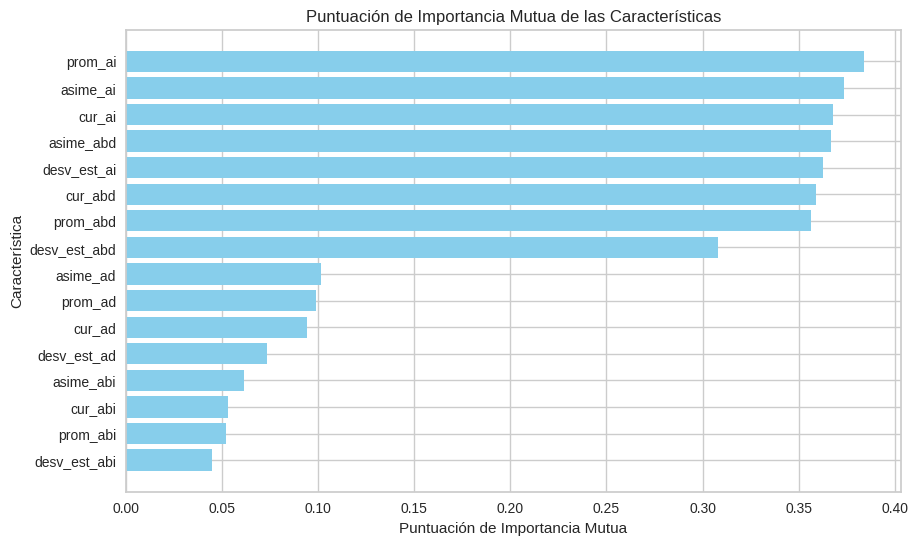

In [ ]:
# Calcula la importancia mutua de las características con respecto a la variable objetivo
feature_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Crea un DataFrame para visualizar las puntuaciones de importancia mutua por característica
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info_Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Mutual_Info_Score', ascending=False)

# Visualiza las puntuaciones de importancia mutua
print(feature_scores_df)

# Gráfica de barras de las puntuaciones de importancia mutua
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df['Feature'], feature_scores_df['Mutual_Info_Score'], color='skyblue')
plt.xlabel('Puntuación de Importancia Mutua')
plt.ylabel('Característica')
plt.title('Puntuación de Importancia Mutua de las Características')
plt.gca().invert_yaxis()  # Invierte el orden de las características para mostrar la más importante en la parte superior
plt.show()


## Chi-square Test

In [ ]:
from scipy.stats import chi2_contingency

# Crear un DataFrame para almacenar los resultados
results_df = pd.DataFrame(columns=['Feature', 'p-value', 'Significativo'])

# Lista para almacenar los resultados
results_list = []

# Variable objetivo
target_variable = 'Clase'

# Iterar a través de todas las características
for feature in images_db_fil.columns:
    if feature != target_variable:  # Evitar comparar la variable objetivo con sí misma
        observed = pd.crosstab(images_db_fil[feature], images_db_fil[target_variable])
        chi2, p, dof, expected = chi2_contingency(observed)
        is_significant = p < 0.05

        # Agregar los resultados al DataFrame
        results_list.append({'Feature': feature, 'p-value': p, 'Significativo': is_significant})

# Crear DataFrame a partir de la lista de resultados
results_df = pd.DataFrame(results_list)
# Visualizar la tabla de resultados
print(results_df)

         Feature        p-value  Significativo
0        prom_ai  5.331142e-230           True
1    desv_est_ai   1.575113e-15           True
2         cur_ai   2.232433e-19           True
3       asime_ai   2.337547e-19           True
4        prom_ad   1.457101e-08           True
5    desv_est_ad   4.735134e-01          False
6         cur_ad   4.784600e-01          False
7       asime_ad   4.735043e-01          False
8       prom_abi   5.967035e-03           True
9   desv_est_abi   3.996345e-01          False
10       cur_abi   3.677881e-01          False
11     asime_abi   3.569353e-01          False
12      prom_abd   4.631949e-96           True
13  desv_est_abd   3.999134e-01          False
14       cur_abd   4.168683e-01          False
15     asime_abd   4.047379e-01          False


In [ ]:
def min_max_scaling(data):
  """
  Transforma los datos a un rango entre 0 y 1.

  Args:
    data: El conjunto de datos.

  Returns:
    El conjunto de datos escalado.
  """
  data_scaled = (data - data.min()) / (data.max() - data.min())
  return data_scaled

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = images_db_fil.drop(columns=['Clase'])
y = images_db_fil['Clase']
X = min_max_scaling(X)

         Feature  Chi-squared Score  Selected
2         cur_ai        1787.276849      True
3       asime_ai        1306.856495      True
1    desv_est_ai        1015.519946      True
0        prom_ai        1000.585217      True
12      prom_abd         635.206926      True
15     asime_abd         465.844549      True
14       cur_abd         417.210864      True
13  desv_est_abd         358.224555      True
4        prom_ad         120.349594      True
10       cur_abi          96.332076      True
8       prom_abi          89.994703      True
11     asime_abi          82.805139      True
9   desv_est_abi          49.115088      True
7       asime_ad          47.886718      True
5    desv_est_ad          37.885856      True
6         cur_ad          29.595485      True


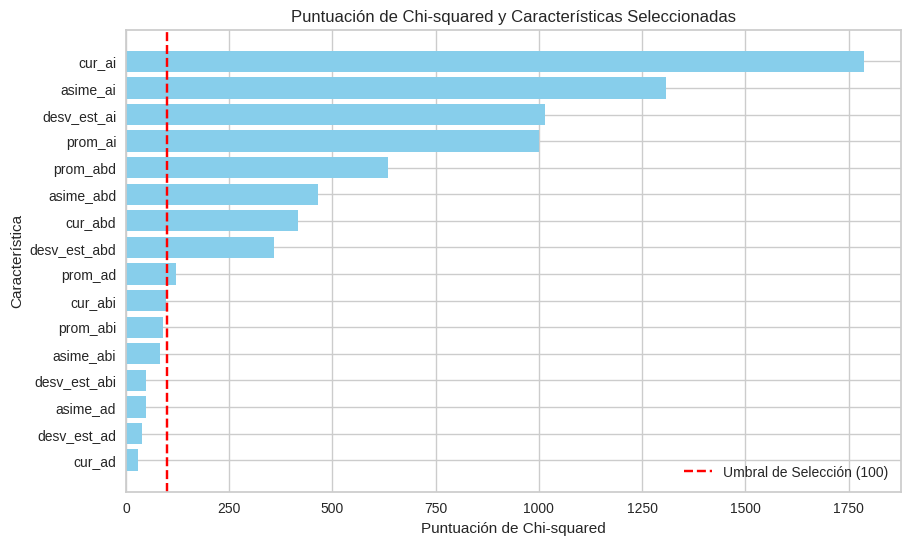

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Crear un objeto SelectKBest con chi2 como métrica
# Especifique el número de características que desea seleccionar con el parámetro 'k'
selector = SelectKBest(score_func=chi2, k='all')

# Ajustar el selector a los datos y obtener las puntuaciones de importancia mutua
X_new = selector.fit_transform(X, y)

# Obtener las puntuaciones de importancia mutua y características seleccionadas
scores = selector.scores_
selected_features = selector.get_support()

# Crear un DataFrame para visualizar las puntuaciones y las características seleccionadas
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Chi-squared Score': scores, 'Selected': selected_features})

# Ordenar por puntuación de chi-cuadrado en orden descendente
feature_scores_df = feature_scores_df.sort_values(by='Chi-squared Score', ascending=False)

# Visualizar la tabla de resultados
print(feature_scores_df)

import matplotlib.pyplot as plt
import numpy as np

# Crear una figura y ejes
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Barra para todas las características con colores diferentes para destacar las seleccionadas
bar_colors = ['skyblue' if selected else 'lightgray' for selected in feature_scores_df['Selected']]
plt.barh(feature_scores_df['Feature'], feature_scores_df['Chi-squared Score'], color=bar_colors)
plt.xlabel('Puntuación de Chi-squared')
plt.ylabel('Característica')
plt.title('Puntuación de Chi-squared y Características Seleccionadas')

# Dibujar una línea vertical en el umbral de selección (puedes ajustar este valor)
threshold = 100  #Valor de ejemplo
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Umbral de Selección ({threshold})')

# Mostrar la leyenda
plt.legend()

# Invertir el orden de las características para mostrar la más importante en la parte superior
ax.invert_yaxis()

# Mostrar el gráfico
plt.show()

In [ ]:
X_cat = X.astype(int)

chi2_features = SelectKBest(score_func=chi2, k= 10)
X_kbest_features = chi2_features.fit_transform(X_cat,y)

print('Numero original de la característica: ', X_cat.shape[1])
print('Numero reducido de características ', X_kbest_features.shape[1])

# Obtén los índices de las características seleccionadas
selected_indices = chi2_features.get_support(indices=True)

# Utiliza los índices para obtener los nombres de las características originales
selected_features = X.columns[selected_indices]

# Imprime las características seleccionadas
print('Características seleccionadas:')
print(selected_features)

# Obtén las puntuaciones de chi-cuadrado de todas las características
all_scores = chi2_features.scores_

# Crear un DataFrame para visualizar todas las características y sus puntuaciones
all_features_df = pd.DataFrame({'Feature': X.columns, 'Chi-squared Score': all_scores})

# Ordenar por puntuación de chi-cuadrado en orden descendente
all_features_df = all_features_df.sort_values(by='Chi-squared Score', ascending=False)

# Visualizar la tabla de todas las características y sus puntuaciones
print(all_features_df)

Numero original de la característica:  16
Numero reducido de características  10
Características seleccionadas:
Index(['desv_est_ai', 'cur_ai', 'asime_ai', 'prom_ad', 'desv_est_ad',
       'prom_abi', 'desv_est_abi', 'cur_abi', 'prom_abd', 'desv_est_abd'],
      dtype='object')
         Feature  Chi-squared Score
3       asime_ai          11.821863
2         cur_ai           7.274993
10       cur_abi           1.818748
0        prom_ai           1.099657
1    desv_est_ai           1.099657
4        prom_ad           1.099657
5    desv_est_ad           1.099657
8       prom_abi           1.099657
9   desv_est_abi           1.099657
12      prom_abd           1.099657
13  desv_est_abd           1.099657
6         cur_ad           0.909374
7       asime_ad           0.909374
11     asime_abi           0.909374
14       cur_abd           0.909374
15     asime_abd           0.909374


## Fisher's Score

         Feature  Fisher_Score        P-Value
1    desv_est_ai  16221.839066   0.000000e+00
0        prom_ai  14028.409525   0.000000e+00
12      prom_abd  13568.215776   0.000000e+00
13  desv_est_abd  11200.945578   0.000000e+00
3       asime_ai   9800.052443   0.000000e+00
15     asime_abd   8731.921538   0.000000e+00
2         cur_ai   6518.961502   0.000000e+00
14       cur_abd   4271.060226   0.000000e+00
4        prom_ad   2593.844303   0.000000e+00
5    desv_est_ad   1707.691448   0.000000e+00
7       asime_ad   1517.997507  5.490233e-314
8       prom_abi   1267.839771  6.201795e-265
11     asime_abi   1153.652733  2.984266e-242
9   desv_est_abi   1054.908059  1.740314e-222
10       cur_abi    705.021502  2.761576e-151
6         cur_ad    543.485422  8.908934e-118


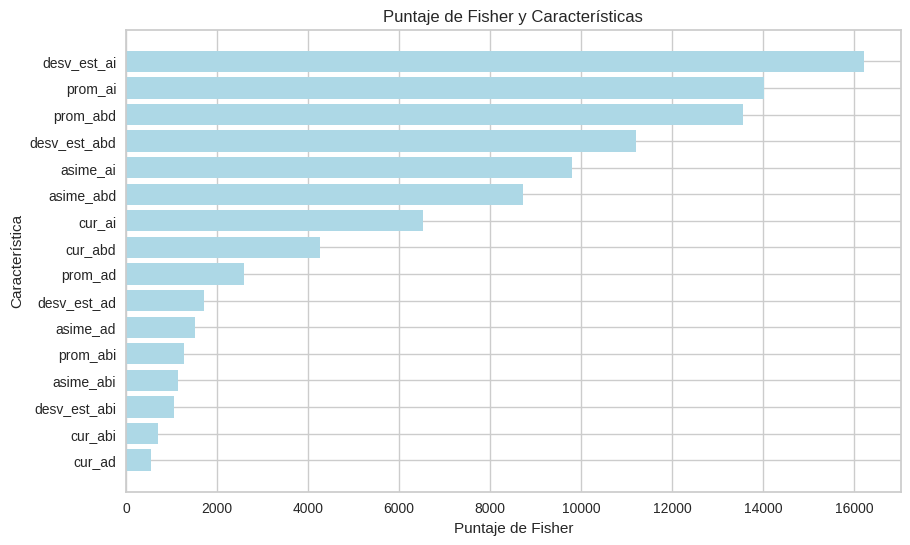

In [ ]:

from sklearn.feature_selection import f_classif

# Calcular el puntaje de Fisher
f_scores, p_values = f_classif(X, y)

# Crear un DataFrame para visualizar los puntajes de Fisher
fisher_scores_df = pd.DataFrame({'Feature': X.columns, 'Fisher_Score': f_scores, 'P-Value': p_values})

# Ordenar por puntaje de Fisher en orden descendente
fisher_scores_df = fisher_scores_df.sort_values(by='Fisher_Score', ascending=False)

# Visualizar la tabla de resultados
print(fisher_scores_df)

# Crear una figura y ejes para graficar los puntajes de Fisher
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Barra para todas las características
plt.barh(fisher_scores_df['Feature'], fisher_scores_df['Fisher_Score'], color='lightblue')
plt.xlabel('Puntaje de Fisher')
plt.ylabel('Característica')
plt.title('Puntaje de Fisher y Características')

# Invertir el orden de las características para mostrar la más importante en la parte superior
ax.invert_yaxis()

# Mostrar el gráfico
plt.show()

## Metodo de la diferencia absoluta (MAD)

                   Feature  MAD_Score
cur_ai              cur_ai   0.246812
asime_ai          asime_ai   0.241752
desv_est_ai    desv_est_ai   0.205922
desv_est_abd  desv_est_abd   0.148640
prom_ai            prom_ai   0.138560
desv_est_abi  desv_est_abi   0.134075
prom_abd          prom_abd   0.130679
prom_abi          prom_abi   0.125191
prom_ad            prom_ad   0.110445
asime_abd        asime_abd   0.105515
desv_est_ad    desv_est_ad   0.100859
asime_abi        asime_abi   0.076958
cur_abd            cur_abd   0.063536
asime_ad          asime_ad   0.046658
cur_abi            cur_abi   0.044969
cur_ad              cur_ad   0.019024


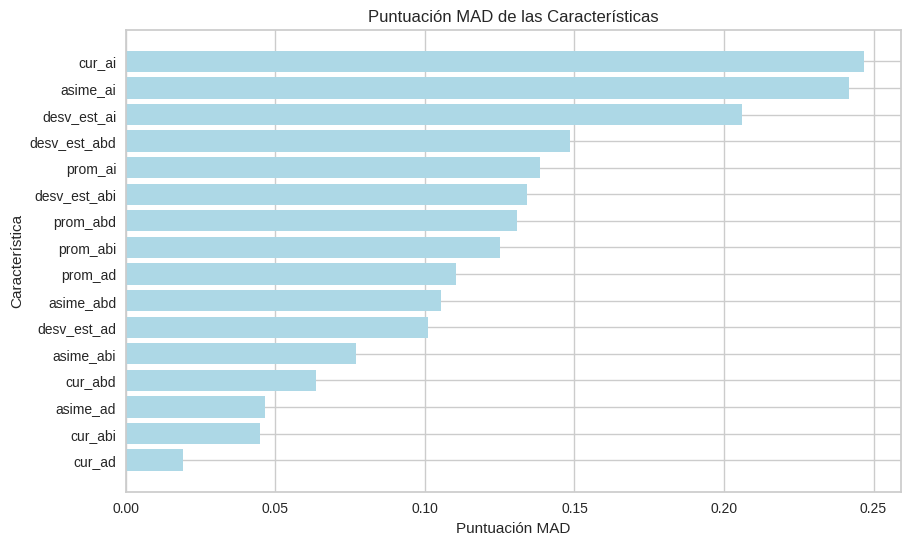

In [ ]:
# Calcular la Mean Absolute Difference (MAD) para cada característica
mean_absolute_differences = np.mean(np.abs(X - np.mean(X, axis=0)), axis=0)

# Crear un DataFrame para visualizar las puntuaciones MAD por característica
mad_scores_df = pd.DataFrame({'Feature': X.columns, 'MAD_Score': mean_absolute_differences})

# Ordenar por puntuación MAD en orden descendente
mad_scores_df = mad_scores_df.sort_values(by='MAD_Score', ascending=False)

# Visualizar la tabla de puntuaciones MAD
print(mad_scores_df)

# Gráfica de barras de las puntuaciones MAD
plt.figure(figsize=(10, 6))
plt.barh(mad_scores_df['Feature'], mad_scores_df['MAD_Score'], color='lightblue')
plt.xlabel('Puntuación MAD')
plt.ylabel('Característica')
plt.title('Puntuación MAD de las Características')
plt.gca().invert_yaxis()  # Invierte el orden de las características para mostrar la más importante en la parte superior
plt.show()


## Conclusión

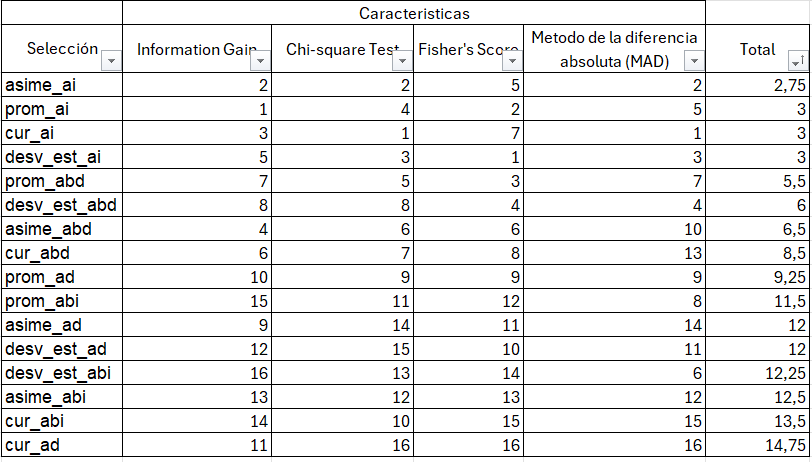

Se realizo una tabla con las posiciones en la que las caracetristicas quedaron en los distintos metodos de selección de caracteristicas. Basado en eso, se decidio tomar 6 de las caracteristicas que son

asime_ai \\
prom_ai \\
cur_ai \\
desv_est_ai \\
prom_abd \\
desv_est_abd

Estas 6 caracteristicas, concuerdan con lo visto en el diagrama de correlación. Cabe destacar que la 7ma y 8va caracteristica al hacer el promedio hace parte tambien de las caracteristicas observadas previamente que son asime_abd y cur_abd

# Universo de entrenamiento

## Escoger Caracteristicas

In [ ]:
images_db_fil.columns

Index(['Clase', 'prom_ai', 'desv_est_ai', 'cur_ai', 'asime_ai', 'prom_ad',
       'desv_est_ad', 'cur_ad', 'asime_ad', 'prom_abi', 'desv_est_abi',
       'cur_abi', 'asime_abi', 'prom_abd', 'desv_est_abd', 'cur_abd',
       'asime_abd'],
      dtype='object')

In [ ]:
# X_std = images_db_fil[['cur_ai', 'asime_ai', 'cur_abi', 'desv_est_abd']].values

X_std = images_db_fil[['asime_ai', 'prom_ai', 'cur_ai', 'desv_est_ai', 'prom_abd', 'desv_est_abd']].values
y = images_db_fil['Clase'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=42)

In [ ]:
#Import the function
from sklearn.preprocessing import StandardScaler

#Say we have a train dataset called Data_train
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

## Modelos de Máquina de Soporte Vectorial (SCV)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from itertools import product
import seaborn as sns

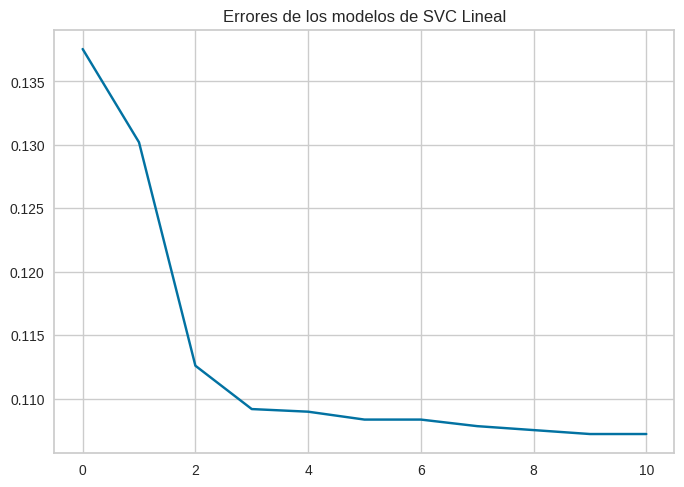

In [ ]:
# Modelo SVM con kernel lineal
cc = [0.0001, 0.005, 0.1, 0.8, 1, 1.5, 2, 5, 10, 50, 100]

combi = list(product(cc))

model_linear = [None for _ in range(len(combi))]

errores = [None for _ in range(len(combi))]
i = 0
iti_li = 0
mini = 2**(32)

for c in combi:
  model_linear[i] = SVC(kernel="linear", C=c[0], random_state=1)
  model_linear[i].fit(X_train, y_train.ravel())
  y_train_pred = model_linear[i].predict(X_train)
  errores[i] = 1 - accuracy_score(y_train, y_train_pred)
  if errores[i] < mini: mini, iti_li = errores[i], i
  i+=1

# Entrenar el perceptrón con el conjunto de entrenamiento

plt.plot(errores)
plt.title("Errores de los modelos de SVC Lineal")
plt.show()

model_linear =  model_linear[iti_li]

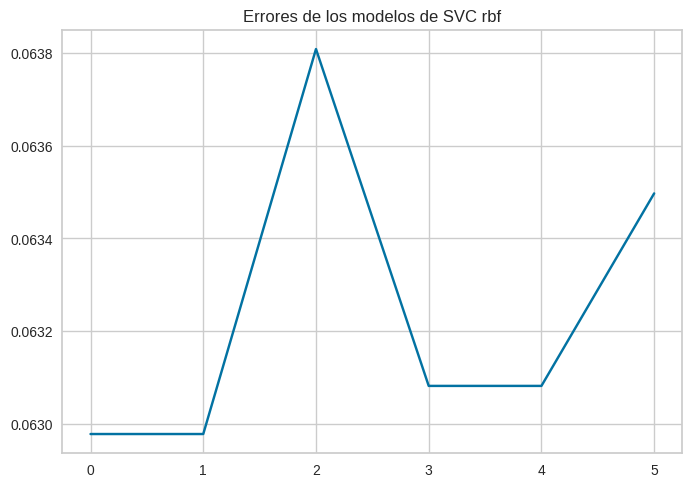

In [ ]:
# Modelo SVM con kernel RBF
cc = [50, 100]
gam = ['scale', 'auto', 0.1]
coef = [0, 0.0001, 0.005, 0.1, 0.8, 1]

combi = list(product(cc, gam))

model_rbf = [None for _ in range(len(combi))]

errores = [None for _ in range(len(combi))]
i = 0
iti_rbf = 0
mini = 2**(32)

for c, ga in combi:
  model_rbf[i] = SVC(kernel='rbf', C=c, gamma=ga)
  model_rbf[i].fit(X_train, y_train.ravel())
  y_train_pred = model_rbf[i].predict(X_train)
  errores[i] = 1 - accuracy_score(y_train, y_train_pred)
  if errores[i] < mini: mini, iti_rbf = errores[i], i
  i+=1

# Entrenar el perceptrón con el conjunto de entrenamiento

plt.plot(errores)
plt.title("Errores de los modelos de SVC rbf")
plt.show()


model_rbf = model_rbf[iti_rbf]

In [ ]:
model_linear.fit(X_train, y_train)
model_rbf.fit(X_train, y_train)

SVC(C=50)

In [ ]:
# Modelo SVM lineal

y_pred_linear = model_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)

print("Modelo SVM lineal:")
print(f"Accuracy: {accuracy_linear}")
print(f"Precisión: {precision_linear}")
print(f"Recuperación: {recall_linear}")
print(f"F1-score: {f1_linear}")

# Modelo SVM RBF
y_pred_rbf = model_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

print("\nModelo SVM RBF:")
print(f"Accuracy: {accuracy_rbf}")
print(f"Precisión: {precision_rbf}")
print(f"Recuperación: {recall_rbf}")
print(f"F1-score: {f1_rbf}")

Modelo SVM lineal:
Accuracy: 0.8791550170860516
Precisión: 0.8970861748295103
Recuperación: 0.8664670658682635
F1-score: 0.8815108132805362

Modelo SVM RBF:
Accuracy: 0.9297918608263436
Precisión: 0.9467821782178217
Recuperación: 0.9161676646706587
F1-score: 0.931223371880706


**Conclusión:** Podemos apreciar que el modelo de Máquina de Soporte Vectorial RBF tiene un mejor rendimiento que el lineal, esto es debido a que las 4 metricas establecidas el modelo supera al lineal.

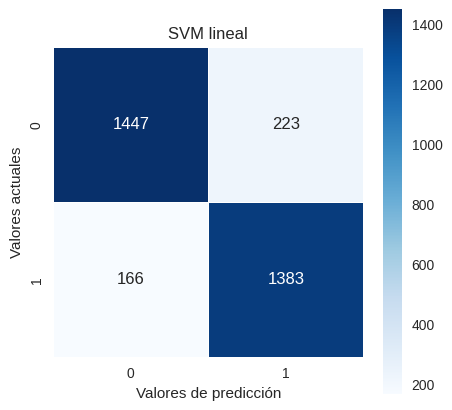

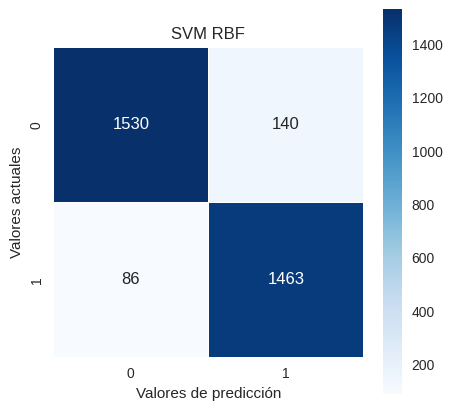

In [ ]:
# Calculate confusion matrix for linear model
confusion_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# Calculate confusion matrix for RBF model
confusion_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
    plt.ylabel('Valores actuales');
    plt.xlabel('Valores de predicción');
    plt.title(title);

plot_confusion_matrix(confusion_matrix_linear, 'SVM lineal')
plot_confusion_matrix(confusion_matrix_rbf, 'SVM RBF')

## Modelos de KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

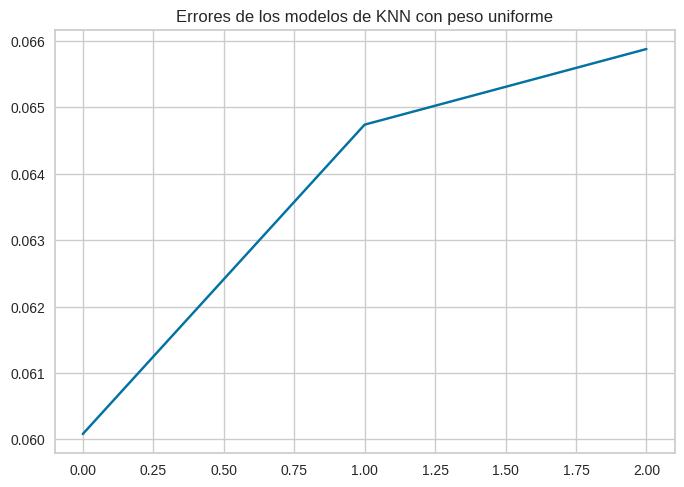

In [ ]:
# Modelo KNN con peso uniforme

neigh = [5, 8, 10]

combi = list(product(neigh))

model_knn_u = [None for _ in range(len(combi))]

errores = [None for _ in range(len(combi))]
i = 0
iti_u = 0
mini = 2**(32)

for n in combi:
  model_knn_u[i] = KNeighborsClassifier(n_neighbors=n[0], weights='uniform')
  model_knn_u[i].fit(X_train, y_train)
  y_train_pred = model_knn_u[i].predict(X_train)
  errores[i] = 1 - accuracy_score(y_train, y_train_pred)
  if errores[i] < mini: mini, iti_rbf = errores[i], i
  i+=1

# Entrenar el perceptrón con el conjunto de entrenamiento

plt.plot(errores)
plt.title("Errores de los modelos de KNN con peso uniforme")
plt.show()

model_knn_u = model_knn_u[iti_u]

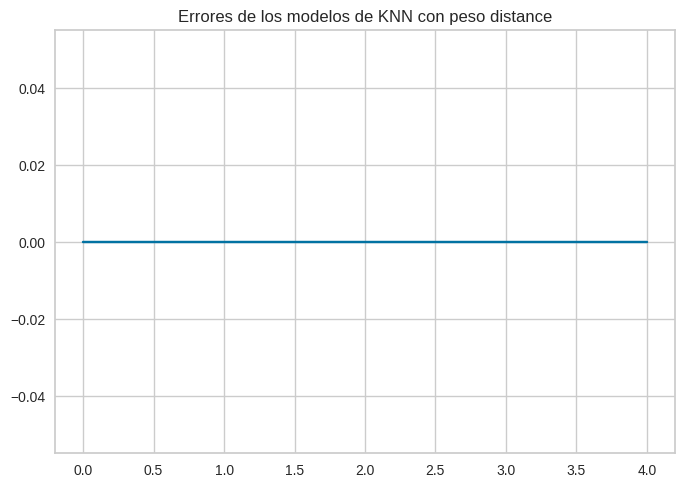

In [ ]:
# Modelo KNN con peso distance

neigh = [3, 4, 5, 8, 10]

combi = list(product(neigh))

model_knn_d = [None for _ in range(len(combi))]

errores = [None for _ in range(len(combi))]
i = 0
iti_d = 0
mini = 2**(32)

for n in combi:
  model_knn_d[i] = KNeighborsClassifier(n_neighbors=n[0], weights='distance')
  model_knn_d[i].fit(X_train, y_train.ravel())
  y_train_pred = model_knn_d[i].predict(X_train)
  errores[i] = 1 - accuracy_score(y_train, y_train_pred)
  if errores[i] < mini: mini, iti_d = errores[i], i
  i+=1

# Entrenar el perceptrón con el conjunto de entrenamiento

plt.plot(errores)
plt.title("Errores de los modelos de KNN con peso distance")
plt.show()

model_knn_d = model_knn_d[iti_d]

In [ ]:
model_knn_u.fit(X_train, y_train)
model_knn_d.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
# Modelo KNN con n_neighbors=5
y_pred_knn_u = model_knn_u.predict(X_test)
accuracy_knn_u = accuracy_score(y_test, y_pred_knn_u)
precision_knn_u = precision_score(y_test, y_pred_knn_u)
recall_knn_u = recall_score(y_test, y_pred_knn_u)
f1_knn_u = f1_score(y_test, y_pred_knn_u)

print("Modelo KNN con weight uniform:")
print(f"Precisión: {accuracy_knn_u}")
print(f"Precisión: {precision_knn_u}")
print(f"Recuperación: {recall_knn_u}")
print(f"F1-score: {f1_knn_u}")

# Modelo KNN con n_neighbors=10
y_pred_knn_d = model_knn_d.predict(X_test)
accuracy_knn_d = accuracy_score(y_test, y_pred_knn_d)
precision_knn_d = precision_score(y_test, y_pred_knn_d)
recall_knn_d = recall_score(y_test, y_pred_knn_d)
f1_knn_d = f1_score(y_test, y_pred_knn_d)

print("\nModelo KNN con weight disntace:")
print(f"Precisión: {accuracy_knn_d}")
print(f"Precisión: {precision_knn_d}")
print(f"Recuperación: {recall_knn_d}")
print(f"F1-score: {f1_knn_d}")

Modelo KNN con weight uniform:
Precisión: 0.907735321528425
Precisión: 0.9277258566978193
Recuperación: 0.8916167664670659
F1-score: 0.9093129770992365

Modelo KNN con weight disntace:
Precisión: 0.9030754892823858
Precisión: 0.9165644171779141
Recuperación: 0.8946107784431138
F1-score: 0.9054545454545455


**Conclusión:** Se puede aprecia que los dos modelos de k-vecinos tienen una precisión similar. Las metricas de por si tambien son muy similares una de la otra.

In [ ]:
# Matriz de confusión del modelo KNN con n_neighbors=5
confusion_matrix_knn_u = confusion_matrix(y_test, y_pred_knn_u)

# Matriz de confusión del modelo KNN con n_neighbors=10
confusion_matrix_knn_d = confusion_matrix(y_test, y_pred_knn_d)

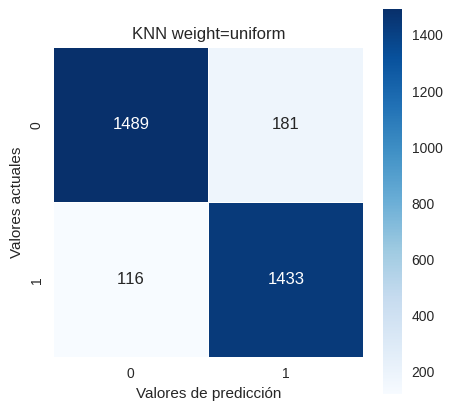

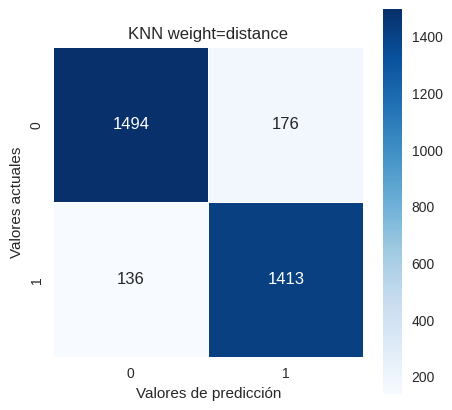

In [ ]:
plot_confusion_matrix(confusion_matrix_knn_u, 'KNN weight=uniform')
plot_confusion_matrix(confusion_matrix_knn_d, 'KNN weight=distance')

## Comparación de resultados

In [ ]:
print("Modelo KNN con weight=uniform:")
print(f"Precisión: {accuracy_knn_u}")
print(f"Precisión: {precision_knn_u}")
print(f"Recuperación: {recall_knn_u}")
print(f"F1-score: {f1_knn_u}")

print("\nModelo KNN con weight=distance:")
print(f"Precisión: {accuracy_knn_d}")
print(f"Precisión: {precision_knn_d}")
print(f"Recuperación: {recall_knn_d}")
print(f"F1-score: {f1_knn_d}")

print("\nModelo SVM RBF:")
print(f"Precisión: {accuracy_rbf}")
print(f"Precisión: {precision_rbf}")
print(f"Recuperación: {recall_rbf}")
print(f"F1-score: {f1_rbf}")

print("\nModelo SVM lineal:")
print(f"Precisión: {accuracy_linear}")
print(f"Precisión: {precision_linear}")
print(f"Recuperación: {recall_linear}")
print(f"F1-score: {f1_linear}")


Modelo KNN con weight=uniform:
Precisión: 0.907735321528425
Precisión: 0.9277258566978193
Recuperación: 0.8916167664670659
F1-score: 0.9093129770992365

Modelo KNN con weight=distance:
Precisión: 0.9030754892823858
Precisión: 0.9165644171779141
Recuperación: 0.8946107784431138
F1-score: 0.9054545454545455

Modelo SVM RBF:
Precisión: 0.9297918608263436
Precisión: 0.9467821782178217
Recuperación: 0.9161676646706587
F1-score: 0.931223371880706

Modelo SVM lineal:
Precisión: 0.8791550170860516
Precisión: 0.8970861748295103
Recuperación: 0.8664670658682635
F1-score: 0.8815108132805362


**Conclusón:** De los 4 modelos escogidos despues de analizar los errores al variar los paramteros. Se puede observar que el modelo con mejor accuracy es la maquina de soporte vectorial RBF, seguida por los modelos de KNN.

# Universo de entrenamiento 2 caracteristicas

## Escoger Caracteristicas

In [ ]:
images_db_fil.columns

Index(['Clase', 'prom_ai', 'desv_est_ai', 'cur_ai', 'asime_ai', 'prom_ad',
       'desv_est_ad', 'cur_ad', 'asime_ad', 'prom_abi', 'desv_est_abi',
       'cur_abi', 'asime_abi', 'prom_abd', 'desv_est_abd', 'cur_abd',
       'asime_abd'],
      dtype='object')

In [ ]:
# X_std = images_db_fil[['cur_ai', 'asime_ai', 'cur_abi', 'desv_est_abd']].values

X_std = images_db_fil[['desv_est_ai', 'cur_ai']].values

y = images_db_fil['Clase'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=42)

In [ ]:
#Import the function
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#Say we have a train dataset called Data_train
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

## Modelos de Máquina de Soporte Vectorial (SCV)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from itertools import product

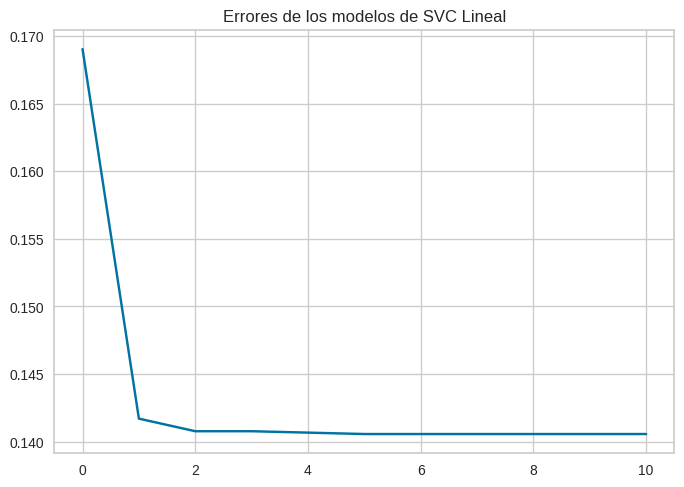

In [ ]:
# Modelo SVM con kernel lineal
cc = [0.0001, 0.005, 0.1, 0.8, 1, 1.5, 2, 5, 10, 50, 100]

combi = list(product(cc))

model_linear = [None for _ in range(len(combi))]

errores = [None for _ in range(len(combi))]
i = 0
iti_li = 0
mini = 2**(32)

for c in combi:
  model_linear[i] = SVC(kernel="linear", C=c[0], random_state=1)
  model_linear[i].fit(X_train, y_train.ravel())
  y_train_pred = model_linear[i].predict(X_train)
  errores[i] = 1 - accuracy_score(y_train, y_train_pred)
  if errores[i] < mini: mini, iti_li = errores[i], i
  i+=1

# Entrenar el perceptrón con el conjunto de entrenamiento

plt.plot(errores)
plt.title("Errores de los modelos de SVC Lineal")
plt.show()

model_linear =  model_linear[iti_li]

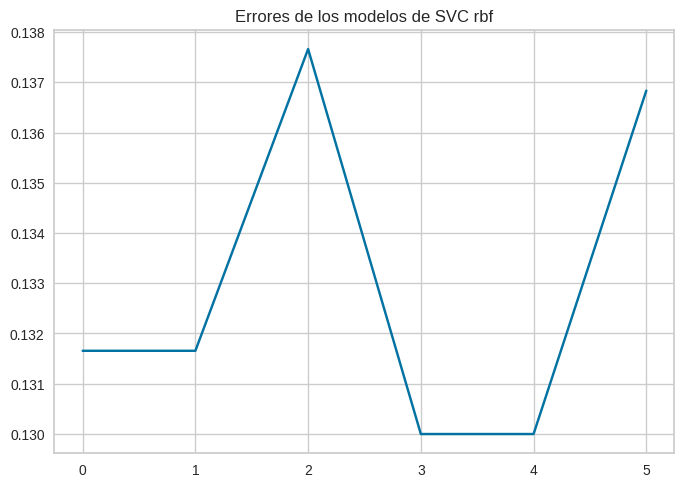

In [ ]:
# Modelo SVM con kernel RBF
cc = [50, 100]
gam = ['scale', 'auto', 0.1]
coef = [0, 0.0001, 0.005, 0.1, 0.8, 1]

combi = list(product(cc, gam))

model_rbf = [None for _ in range(len(combi))]

errores = [None for _ in range(len(combi))]
i = 0
iti_rbf = 0
mini = 2**(32)

for c, ga in combi:
  model_rbf[i] = SVC(kernel='rbf', C=c, gamma=ga)
  model_rbf[i].fit(X_train, y_train.ravel())
  y_train_pred = model_rbf[i].predict(X_train)
  errores[i] = 1 - accuracy_score(y_train, y_train_pred)
  if errores[i] < mini: mini, iti_rbf = errores[i], i
  i+=1

# Entrenar el perceptrón con el conjunto de entrenamiento

plt.plot(errores)
plt.title("Errores de los modelos de SVC rbf")
plt.show()


model_rbf = model_rbf[iti_rbf]

In [ ]:
model_linear.fit(X_train, y_train)
model_rbf.fit(X_train, y_train)

SVC(C=100)

In [ ]:
# Modelo SVM lineal

y_pred_linear = model_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)

print("Modelo SVM lineal:")
print(f"Accuracy: {accuracy_linear}")
print(f"Precisión: {precision_linear}")
print(f"Recuperación: {recall_linear}")
print(f"F1-score: {f1_linear}")

# Modelo SVM RBF
y_pred_rbf = model_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

print("\nModelo SVM RBF:")
print(f"Accuracy: {accuracy_rbf}")
print(f"Precisión: {precision_rbf}")
print(f"Recuperación: {recall_rbf}")
print(f"F1-score: {f1_rbf}")

Modelo SVM lineal:
Accuracy: 0.8362845604224914
Precisión: 0.89937106918239
Recuperación: 0.7706586826347306
F1-score: 0.8300548210254757

Modelo SVM RBF:
Accuracy: 0.851506679092886
Precisión: 0.8931398416886543
Recuperación: 0.8107784431137725
F1-score: 0.8499686126804771


**Conclusión:** Podemos apreciar que el modelo de Máquina de Soporte Vectorial RBF tiene un mejor rendimiento que el lineal, esto es debido a que las 4 metricas establecidas el modelo supera al lineal.

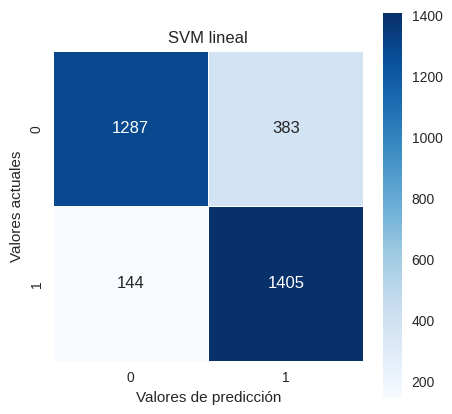

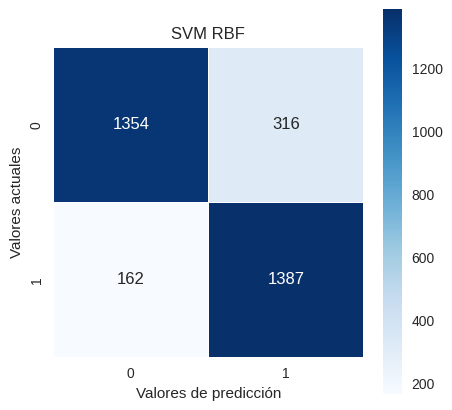

In [ ]:
# Calculate confusion matrix for linear model
confusion_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# Calculate confusion matrix for RBF model
confusion_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
    plt.ylabel('Valores actuales');
    plt.xlabel('Valores de predicción');
    plt.title(title);

plot_confusion_matrix(confusion_matrix_linear, 'SVM lineal')
plot_confusion_matrix(confusion_matrix_rbf, 'SVM RBF')

## Modelos de KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

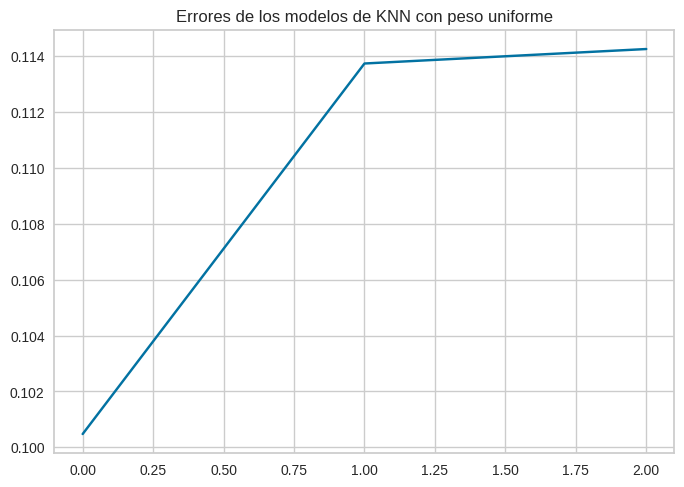

In [ ]:
# Modelo KNN con peso uniforme

neigh = [5, 8, 10]

combi = list(product(neigh))

model_knn_u = [None for _ in range(len(combi))]

errores = [None for _ in range(len(combi))]
i = 0
iti_u = 0
mini = 2**(32)

for n in combi:
  model_knn_u[i] = KNeighborsClassifier(n_neighbors=n[0], weights='uniform')
  model_knn_u[i].fit(X_train, y_train)
  y_train_pred = model_knn_u[i].predict(X_train)
  errores[i] = 1 - accuracy_score(y_train, y_train_pred)
  if errores[i] < mini: mini, iti_rbf = errores[i], i
  i+=1

# Entrenar el perceptrón con el conjunto de entrenamiento

plt.plot(errores)
plt.title("Errores de los modelos de KNN con peso uniforme")
plt.show()

model_knn_u = model_knn_u[iti_u]

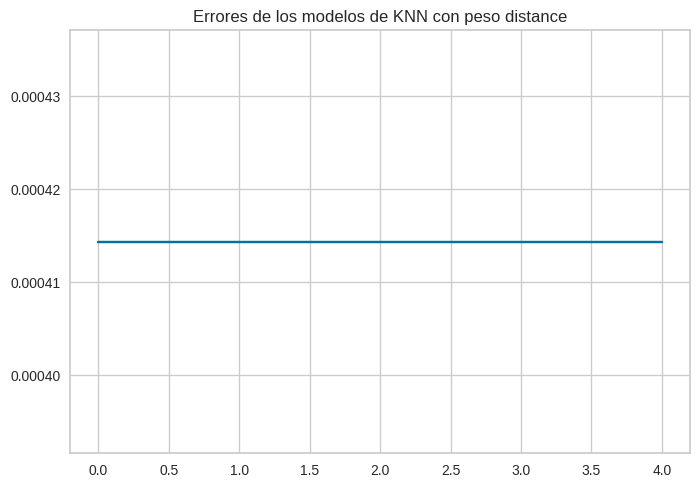

In [ ]:
# Modelo KNN con peso distance

neigh = [3, 4, 5, 8, 10]

combi = list(product(neigh))

model_knn_d = [None for _ in range(len(combi))]

errores = [None for _ in range(len(combi))]
i = 0
iti_d = 0
mini = 2**(32)

for n in combi:
  model_knn_d[i] = KNeighborsClassifier(n_neighbors=n[0], weights='distance')
  model_knn_d[i].fit(X_train, y_train.ravel())
  y_train_pred = model_knn_d[i].predict(X_train)
  errores[i] = 1 - accuracy_score(y_train, y_train_pred)
  if errores[i] < mini: mini, iti_d = errores[i], i
  i+=1

# Entrenar el perceptrón con el conjunto de entrenamiento

plt.plot(errores)
plt.title("Errores de los modelos de KNN con peso distance")
plt.show()

model_knn_d = model_knn_d[iti_d]

In [ ]:
model_knn_u.fit(X_train, y_train)
model_knn_d.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
# Modelo KNN con n_neighbors=5
y_pred_knn_u = model_knn_u.predict(X_test)
accuracy_knn_u = accuracy_score(y_test, y_pred_knn_u)
precision_knn_u = precision_score(y_test, y_pred_knn_u)
recall_knn_u = recall_score(y_test, y_pred_knn_u)
f1_knn_u = f1_score(y_test, y_pred_knn_u)

print("Modelo KNN con weight uniform:")
print(f"Precisión: {accuracy_knn_u}")
print(f"Precisión: {precision_knn_u}")
print(f"Recuperación: {recall_knn_u}")
print(f"F1-score: {f1_knn_u}")

# Modelo KNN con n_neighbors=10
y_pred_knn_d = model_knn_d.predict(X_test)
accuracy_knn_d = accuracy_score(y_test, y_pred_knn_d)
precision_knn_d = precision_score(y_test, y_pred_knn_d)
recall_knn_d = recall_score(y_test, y_pred_knn_d)
f1_knn_d = f1_score(y_test, y_pred_knn_d)

print("\nModelo KNN con weight disntace:")
print(f"Precisión: {accuracy_knn_d}")
print(f"Precisión: {precision_knn_d}")
print(f"Recuperación: {recall_knn_d}")
print(f"F1-score: {f1_knn_d}")

Modelo KNN con weight uniform:
Precisión: 0.8456042249145698
Precisión: 0.8681732580037664
Recuperación: 0.8281437125748503
F1-score: 0.8476861783634693

Modelo KNN con weight disntace:
Precisión: 0.8331780055917987
Precisión: 0.8503401360544217
Recuperación: 0.8233532934131736
F1-score: 0.836629145117128


**Conclusión:** Se puede aprecia que los dos modelos de k-vecinos tienen una precisión similar. Las metricas de por si tambien son muy similares una de la otra.

In [ ]:
# Matriz de confusión del modelo KNN con n_neighbors=5
confusion_matrix_knn_u = confusion_matrix(y_test, y_pred_knn_u)

# Matriz de confusión del modelo KNN con n_neighbors=10
confusion_matrix_knn_d = confusion_matrix(y_test, y_pred_knn_d)

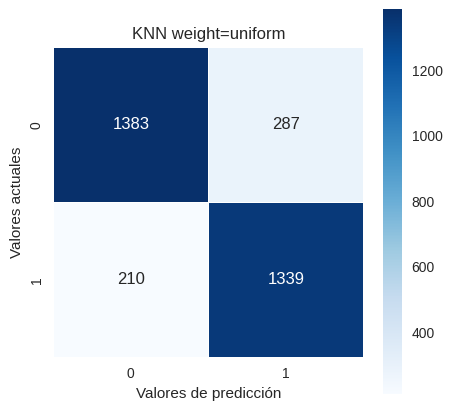

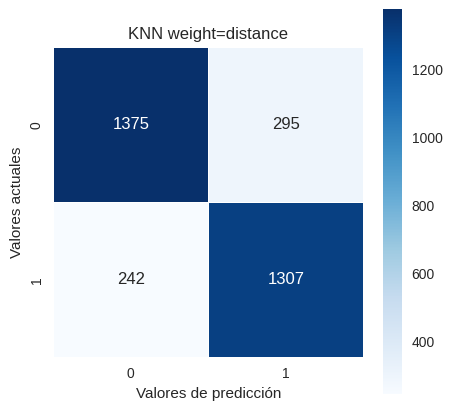

In [ ]:
plot_confusion_matrix(confusion_matrix_knn_u, 'KNN weight=uniform')
plot_confusion_matrix(confusion_matrix_knn_d, 'KNN weight=distance')

## Comparación de resultados

In [ ]:
print("Modelo KNN con weight=uniform:")
print(f"Precisión: {accuracy_knn_u}")
print(f"Precisión: {precision_knn_u}")
print(f"Recuperación: {recall_knn_u}")
print(f"F1-score: {f1_knn_u}")

print("\nModelo KNN con weight=distance:")
print(f"Precisión: {accuracy_knn_d}")
print(f"Precisión: {precision_knn_d}")
print(f"Recuperación: {recall_knn_d}")
print(f"F1-score: {f1_knn_d}")

print("\nModelo SVM RBF:")
print(f"Precisión: {accuracy_rbf}")
print(f"Precisión: {precision_rbf}")
print(f"Recuperación: {recall_rbf}")
print(f"F1-score: {f1_rbf}")

print("Modelo SVM lineal:")
print(f"Precisión: {accuracy_linear}")
print(f"Precisión: {precision_linear}")
print(f"Recuperación: {recall_linear}")
print(f"F1-score: {f1_linear}")


Modelo KNN con weight=uniform:
Precisión: 0.8456042249145698
Precisión: 0.8681732580037664
Recuperación: 0.8281437125748503
F1-score: 0.8476861783634693

Modelo KNN con weight=distance:
Precisión: 0.8331780055917987
Precisión: 0.8503401360544217
Recuperación: 0.8233532934131736
F1-score: 0.836629145117128

Modelo SVM RBF:
Precisión: 0.851506679092886
Precisión: 0.8931398416886543
Recuperación: 0.8107784431137725
F1-score: 0.8499686126804771
Modelo SVM lineal:
Precisión: 0.8362845604224914
Precisión: 0.89937106918239
Recuperación: 0.7706586826347306
F1-score: 0.8300548210254757


***Conclusión:*** Tras un análisis exhaustivo de los errores variando los parámetros en 4 modelos diferentes, se observa que el modelo de Máquina de Soporte Vectorial (SVM) con kernel RBF supera a los demás en términos de precisión. Este modelo alcanza un accuracy de 0.85, una precisión de 0.89, una recuperación de 0.81 y un puntaje F1 de 0.85.

En segundo lugar, encontramos el modelo KNN con peso uniforme, con una accuracy de 0.85, una precisión de 0.87, una recuperación de 0.83 y un puntaje F1 de 0.85.

Esto indica que, para este conjunto de datos y con los parámetros seleccionados, no hay un modelo que destaque sobre los otros.

Es importante mencionar que los modelos KNN con peso distance y SVC lineal también mostraron un buen rendimiento, aunque no superaron a los anteriores.

En particular, podemos ver (con respecto a las matrices de confusión) que el modelo SVM rbf, tienen un rendimiento superior en comparación con los modelos KNN, ya que tienen un mayor número de verdaderos positivos y verdaderos negativos. Esto indica que el modelo SVM rbf es más precisos y confiables para este conjunto de datos específico.

Estos resultados, junto con los gráficos correspondientes, proporcionan una visión clara del rendimiento de cada modelo y su aplicabilidad a este conjunto de datos específico.

## Graficas

[[ 1.32153041 -1.40072254]]


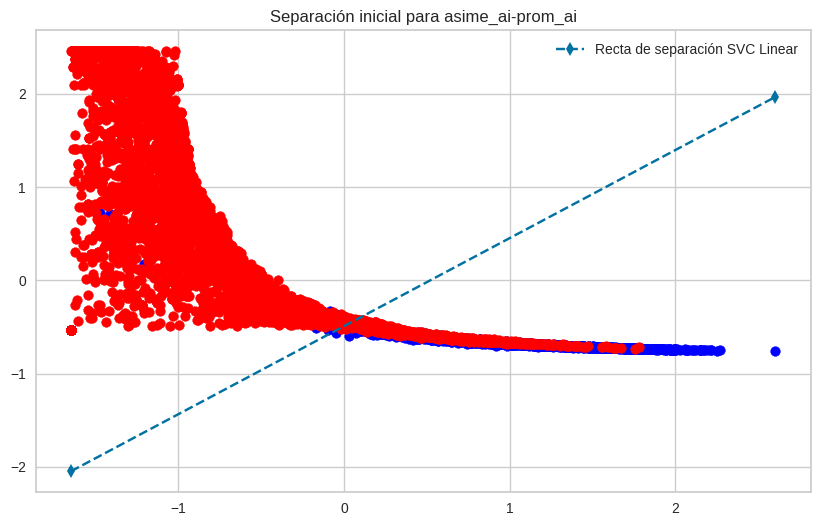

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_values(X, y):
    # Graficar los puntos de datos
    plt.figure(figsize=(10, 6))
    x0 = [X[i][0] for i in range(len(X)) if y[i] == 3]
    x1 = [X[i][1] for i in range(len(X)) if y[i] == 3]
    plt.scatter(x0, x1, color="blue")
    x0 = [X[i][0] for i in range(len(X)) if y[i] == 1]
    x1 = [X[i][1] for i in range(len(X)) if y[i] == 1]
    plt.scatter(x0, x1, color="red")

# Función para graficar los datos y la recta de separación inicial
def plot_initial_decision_boundary(X, ppn, clasifi, color):
    print(ppn.coef_)
    # Extraer los pesos iniciales
    w1, w2, b = ppn.coef_[0][0], ppn.coef_[0][1], ppn.intercept_[0]

    # Calcular la recta de separación
    x_values = np.array([X[:, 0].min(), X[:, 0].max()])
    y_values = -(w1 / w2) * x_values - b / w2

    # Graficar la recta de separación
    plt.plot(x_values, y_values, f'{color}--', label=f'Recta de separación {clasifi}')


plot_values(X_train, y_train)
plot_initial_decision_boundary(X_train, model_linear, "SVC Linear", "d")
# plot_initial_decision_boundary(X_train, model_rbf, "SVC RBF", "y")
# plot_initial_decision_boundary(X_train, model_knn_u, "KNN Uniform", "k")
# plot_initial_decision_boundary(X_train, model_knn_d, "KNN distance", "g")

plt.title('Separación inicial para asime_ai-prom_ai')
plt.legend()
plt.grid(True)
plt.show()